In [0]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

In [0]:
df = spark.read.csv("/FileStore/tables/house_price_regression_dataset.csv", header = True, inferSchema = True)
df.describe()
# df.printSchema()

root
 |-- Square_Footage: integer (nullable = true)
 |-- Num_Bedrooms: integer (nullable = true)
 |-- Num_Bathrooms: integer (nullable = true)
 |-- Year_Built: integer (nullable = true)
 |-- Lot_Size: double (nullable = true)
 |-- Garage_Size: integer (nullable = true)
 |-- Neighborhood_Quality: integer (nullable = true)
 |-- House_Price: double (nullable = true)



In [0]:
pdf = df.toPandas()
pdf.head(5)

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [0]:
pdf.info()
null_count = pdf.isnull().sum()
null_count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int32  
 1   Num_Bedrooms          1000 non-null   int32  
 2   Num_Bathrooms         1000 non-null   int32  
 3   Year_Built            1000 non-null   int32  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int32  
 6   Neighborhood_Quality  1000 non-null   int32  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int32(6)
memory usage: 39.2 KB


Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64

                      Square_Footage  ...  House_Price
Square_Footage              1.000000  ...     0.991261
Num_Bedrooms               -0.043564  ...     0.014633
Num_Bathrooms              -0.031584  ...    -0.001862
Year_Built                 -0.022392  ...     0.051967
Lot_Size                    0.089479  ...     0.160412
Garage_Size                 0.030593  ...     0.052133
Neighborhood_Quality       -0.008357  ...    -0.007770
House_Price                 0.991261  ...     1.000000

[8 rows x 8 columns]


<Axes: >

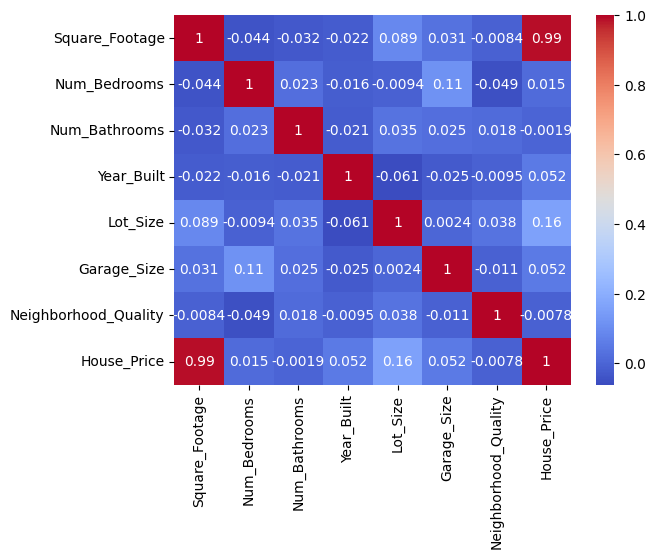

In [0]:
corr = pdf.corr()
print(corr)
sns.heatmap(corr, annot = True, cmap = "coolwarm")

/databricks/python/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


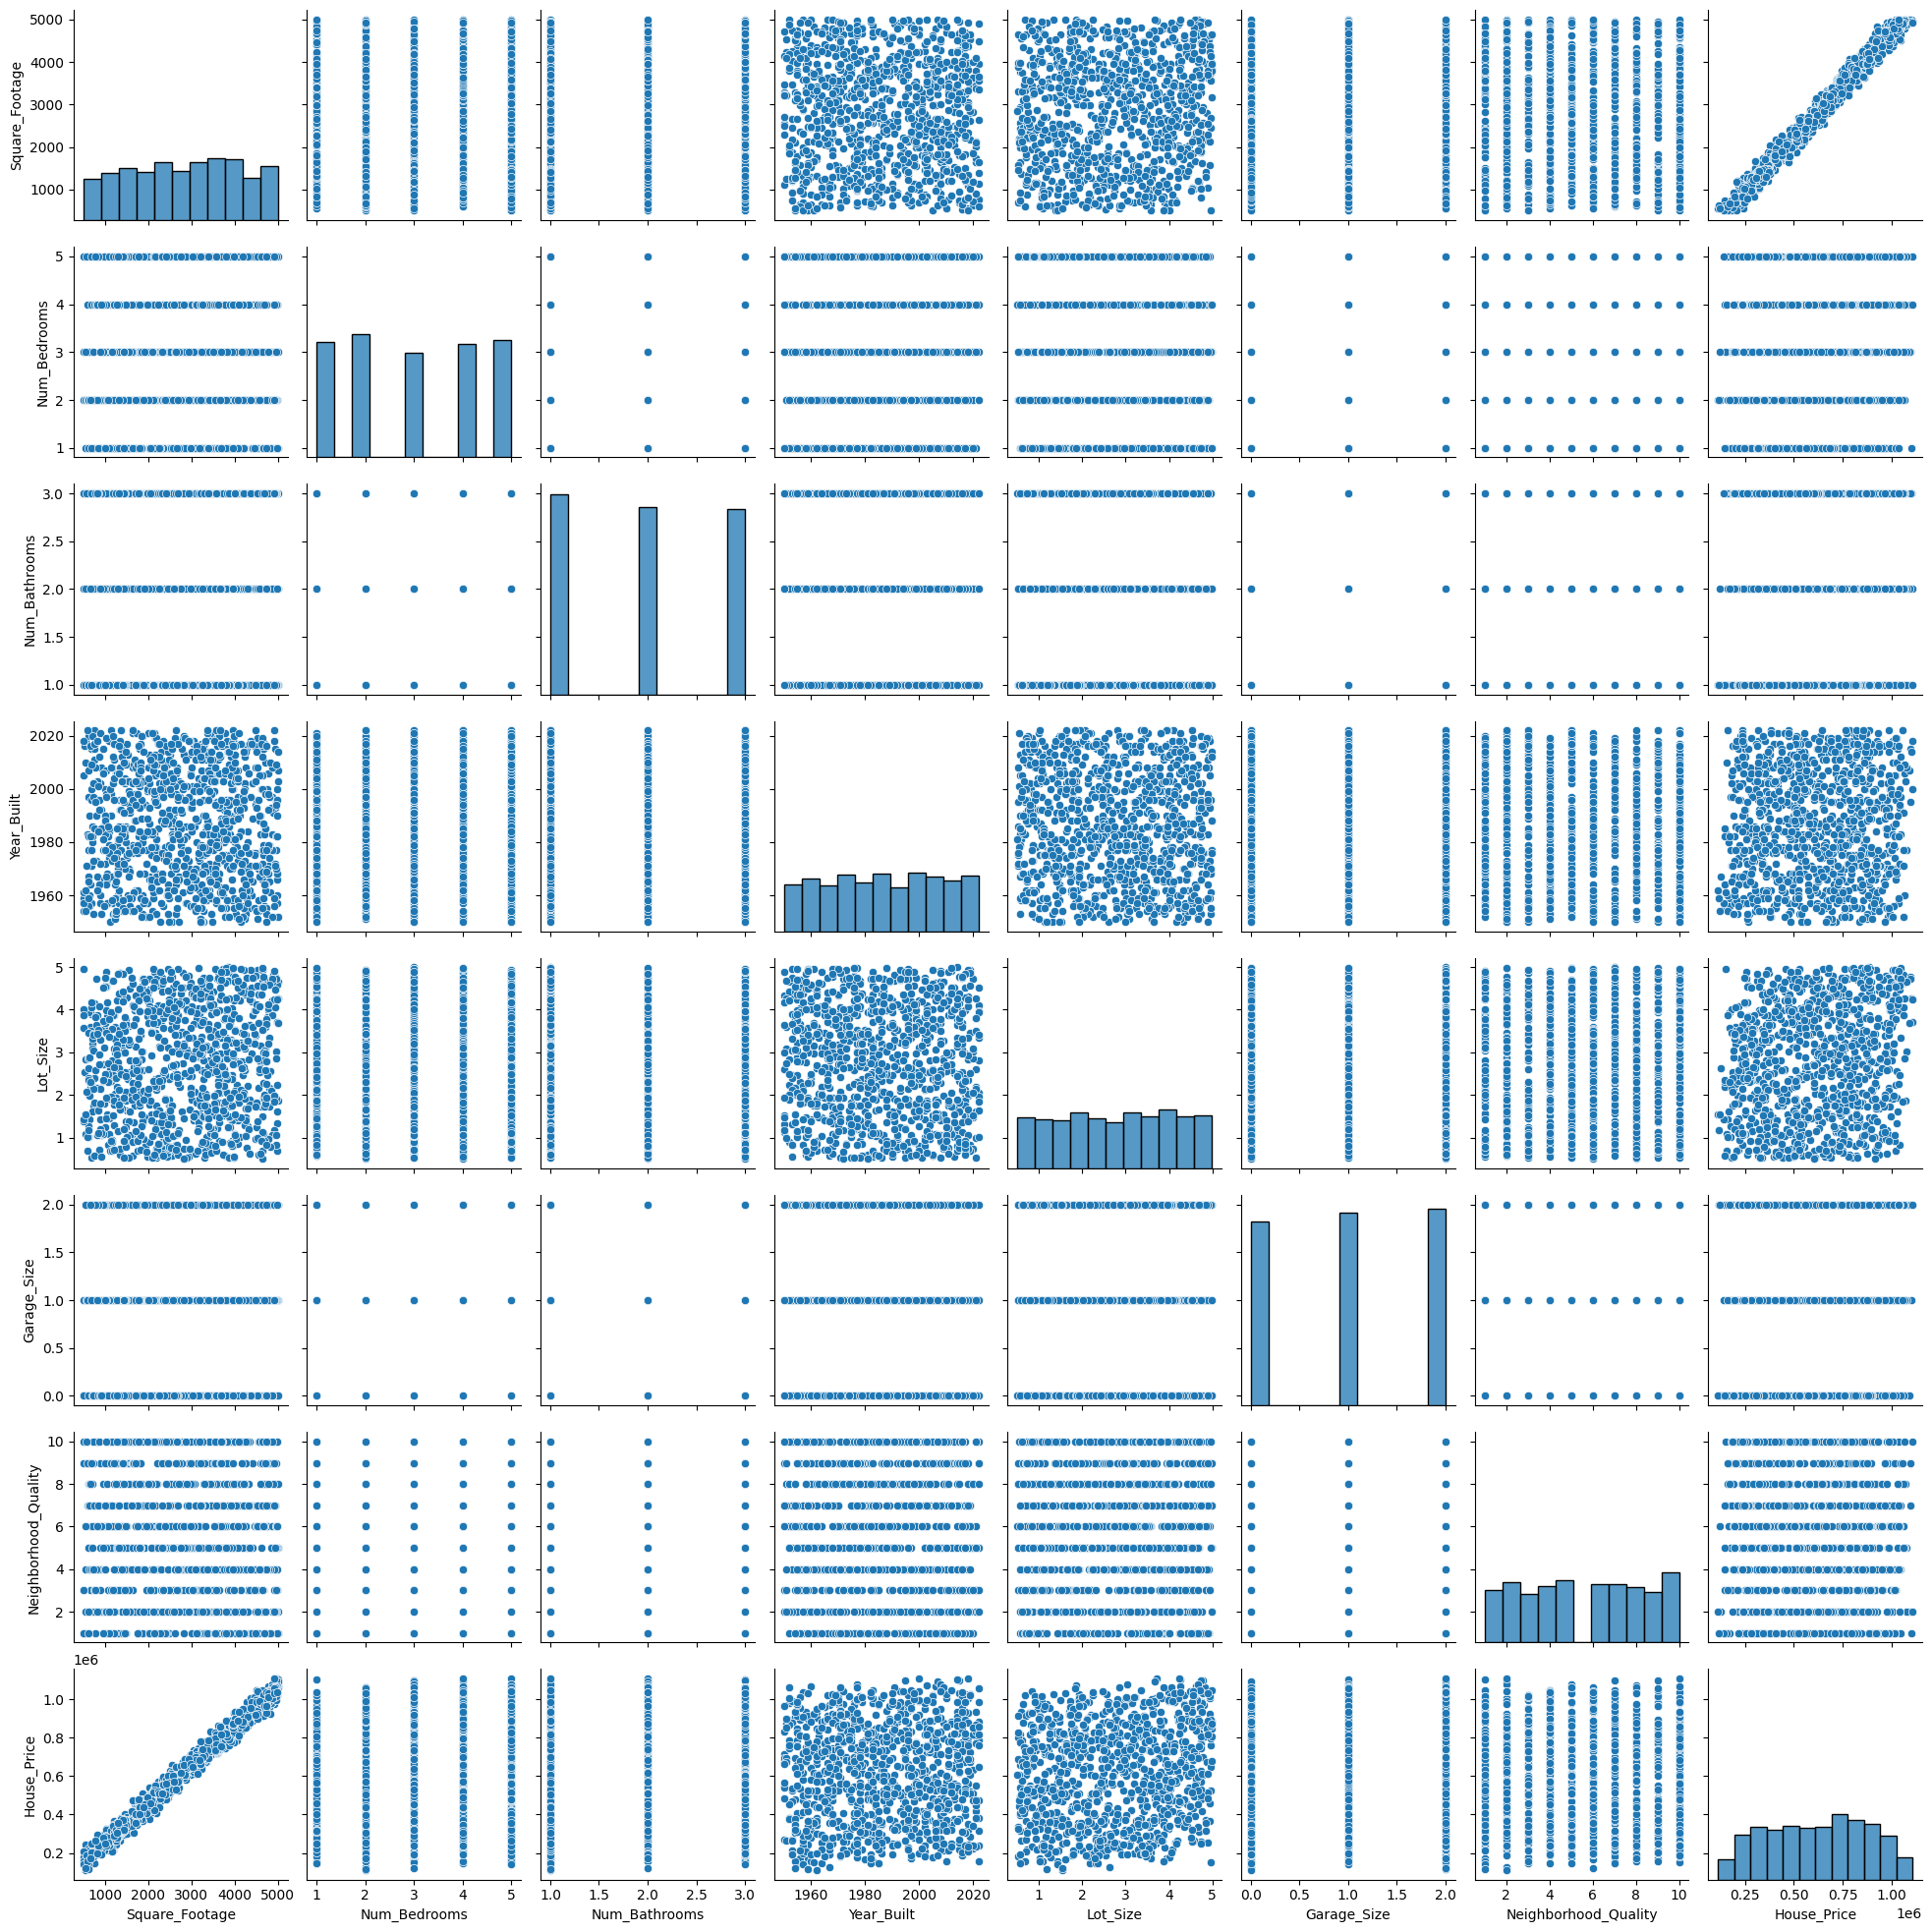

In [0]:
sns.pairplot(pdf)


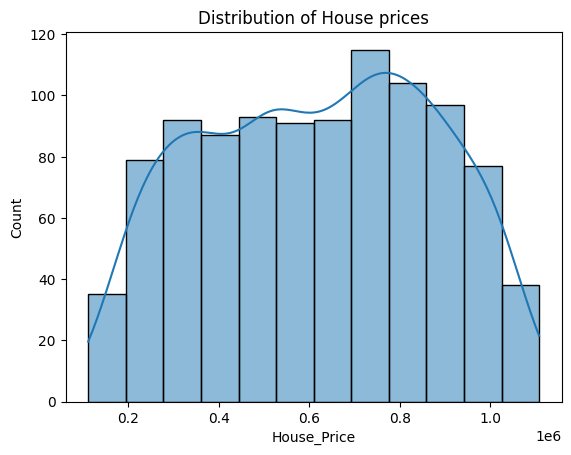

In [0]:
sns.histplot(pdf['House_Price'], kde = True)
plt.title("Distribution of House prices")
plt.show()  # Adjust this based on your data


In [0]:
# testing hypothesis 1 old houses are expensive than new
print(pdf['Year_Built'].mean())
oldhouses = pdf[pdf['Year_Built'] < 1987]['House_Price']
newhouses = pdf[pdf['Year_Built'] >= 1987]['House_Price']
t_stat, p_value = stats.ttest_ind(oldhouses, newhouses)
print(t_stat,p_value)
#negative t stat mean of the first group is less than the mean of the second group
#p-value <0.05 observed data is unlikely under the null hypothesis
#old houses are not expensive than new



1986.55
-2.1923800948941348 0.02858237940204271


In [0]:
from statsmodels.stats.weightstats import DescrStatsW

# Assuming you have already imported necessary libraries and your data is loaded in pdf

# A/B test 
group_a = pdf[pdf['Garage_Size'] == 0]['House_Price']
group_b = pdf[pdf['Garage_Size'] >= 0]['House_Price']
print(len(group_a), len(group_b))
print(group_a.mean(), group_b.mean())

# Perform t-test
t_stat, p_value = stats.ttest_ind(group_a, group_b)
print(t_stat, p_value)

# Create DescrStatsW objects
stats_a = DescrStatsW(group_a)
stats_b = DescrStatsW(group_b)

# Compare means
cm = sm.stats.CompareMeans(stats_a, stats_b)
conf_interval = cm.tconfint_diff()
print(conf_interval)

#we saw from the results that p value is greater than 0.05 we fail to reject null hypothesis means no significant difference in the prices of houses with larger garages, also the t-stat is negative but close to 0 means no significant difference in the prices of the two groups, also the CI for difference in means contains zero means which further supports our conclusion of no significant difference in house prices

321 1000
606031.5052246427 618861.0186467685
-0.792760520114677 0.42805992896169454
(-44577.41054840805, 18918.383704156382)


In [0]:
from pyspark.sql.functions import min,max, avg, stddev, count, sum
df.agg(stddev("Year_Built")).show()

+------------------+
|stddev(Year_Built)|
+------------------+
|20.632915868030334|
+------------------+



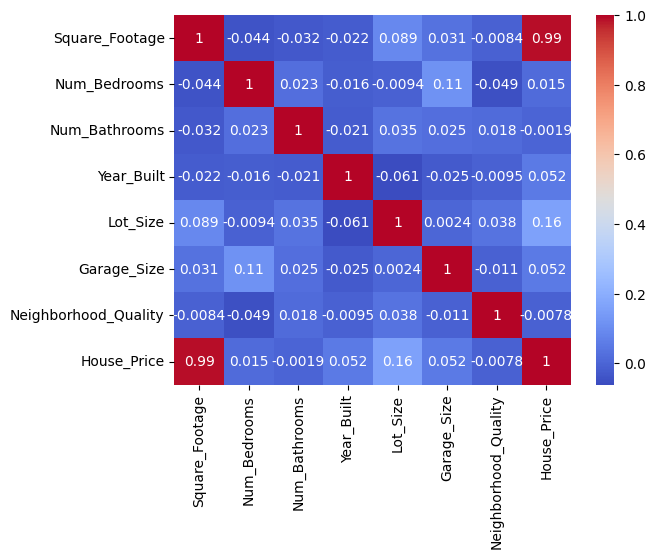

In [0]:
#visualization practice
# sns.countplot(x='Garage_Size', data = pdf)
# sns.boxplot(x='Neighborhood_Quality', y='House_Price', data = pdf)
# sns.regplot(x='Year_Built', y='House_Price', data = pdf)
sns.lineplot(x='Year_Built', y='House_Price', data = pdf)
sns.heatmap(data = pdf.corr(), annot =True, cmap='coolwarm')


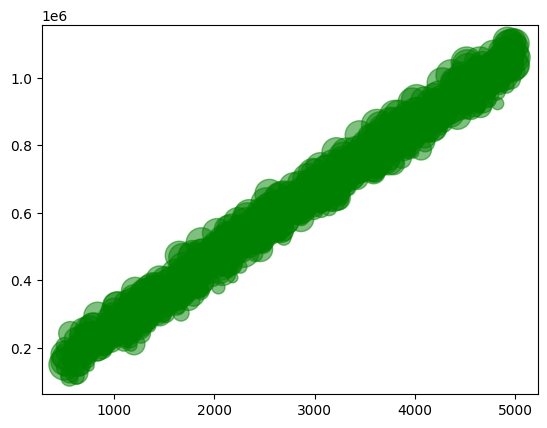

In [0]:
plt.scatter(pdf['Square_Footage'], pdf['House_Price'], s=pdf['Lot_Size']*100, alpha = 0.5, color = 'green')
plt.show()

/databricks/python/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


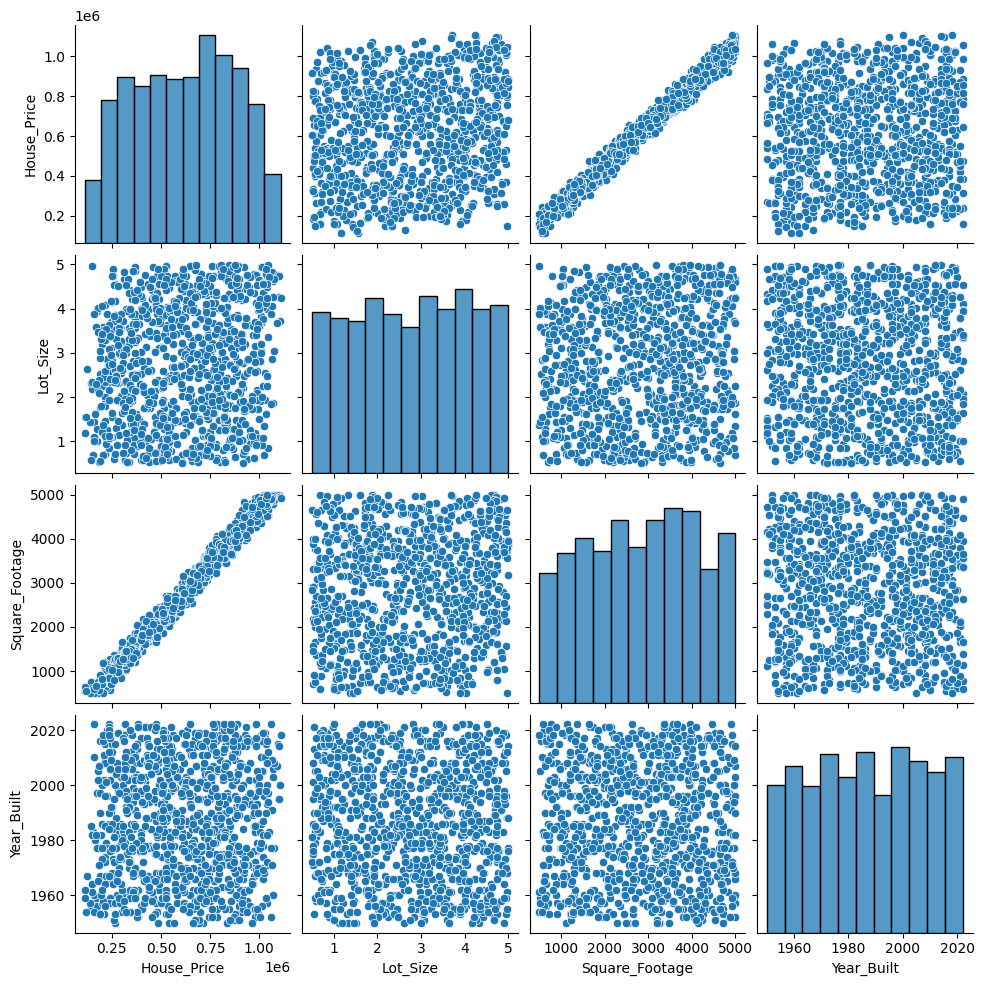

In [0]:
sns.pairplot(pdf[['House_Price','Lot_Size','Square_Footage','Year_Built']])

Year_Built
1950    636577.285382
1951    709195.029666
1952    742316.212927
1953    504927.492390
1954    467964.655483
            ...      
2018    639083.336066
2019    672697.024031
2020    511108.707612
2021    610684.101700
2022    643787.468728
Name: House_Price, Length: 73, dtype: float64


<Axes: xlabel='Year_Built', ylabel='House_Price'>

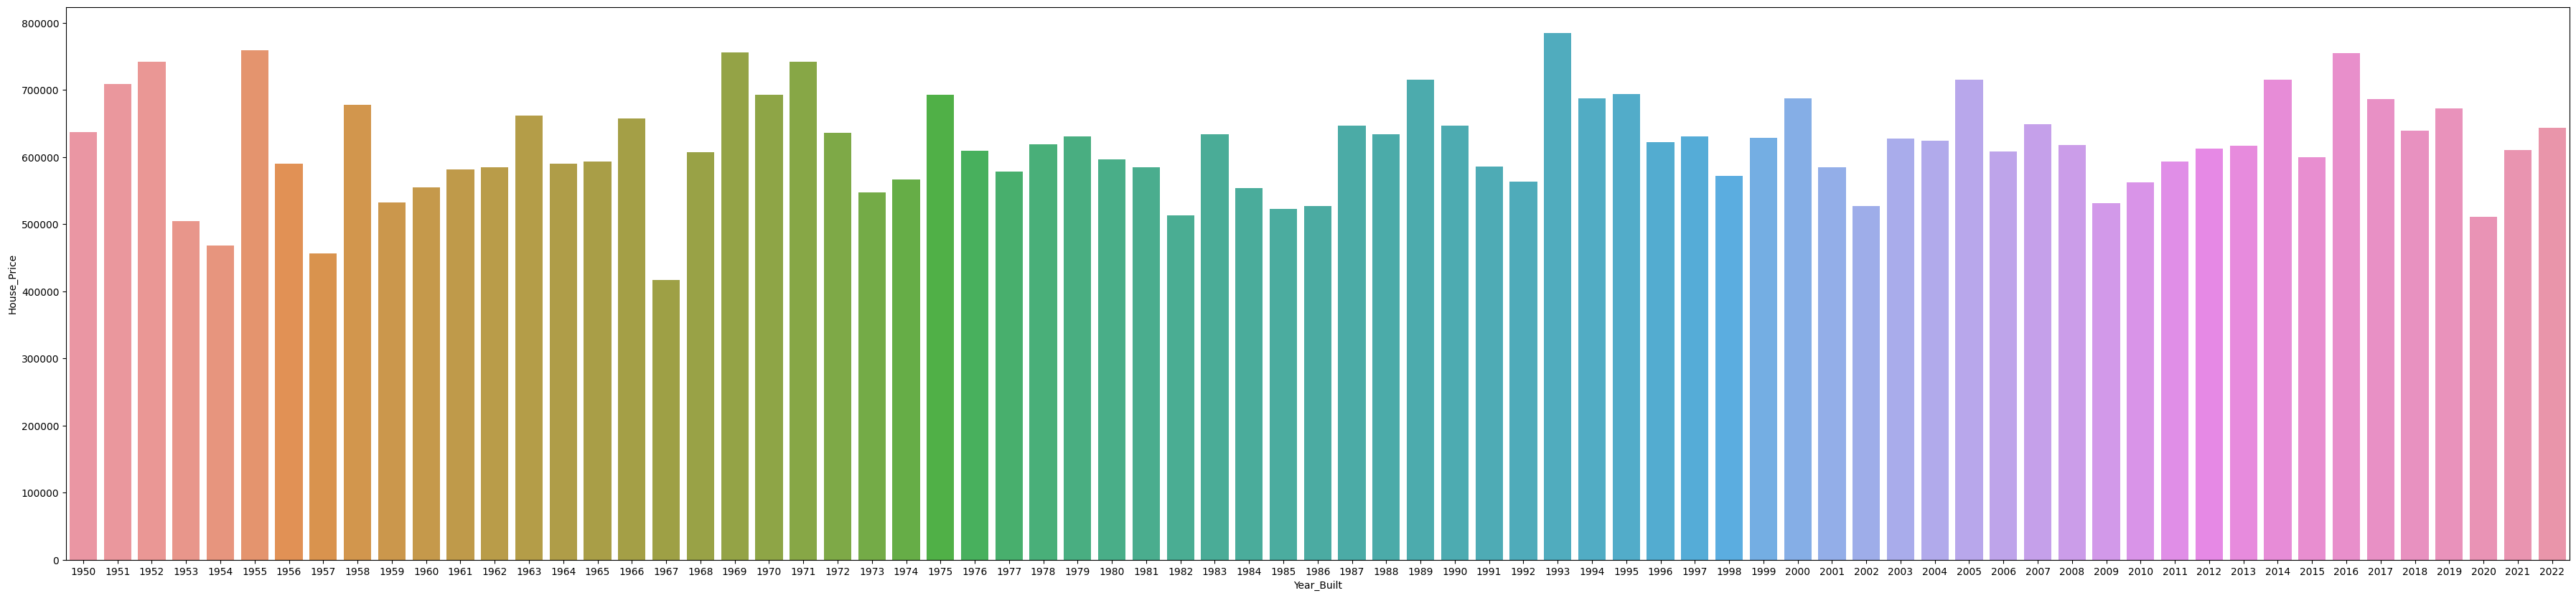

In [0]:
year_built_avg = pdf.groupby('Year_Built')['House_Price'].mean()
print(year_built_avg)
plt.figure(figsize=(45,10))  # Increase width for better label spacing
sns.barplot(x='Year_Built', y='House_Price', data = year_built_avg.reset_index())

In [0]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

pdf_1 = pdf.copy()
x = pdf[['Lot_Size','Square_Footage','House_Price']]
y = pdf['Garage_Size']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)
model = LogisticRegression()
model.fit(x_train, y_train)
preds = model.predict(x_test)
results = pd.DataFrame({'Actual':y_test, 'Predicted':preds})
print(results)
print(classification_report(y_test, preds))
print(accuracy_score(y_test,preds))

/databricks/python/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Uploading artifacts:   0%|          | 0/1 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

     Actual  Predicted
521       1          2
737       1          2
740       1          2
660       1          2
411       0          2
..      ...        ...
408       2          2
332       1          2
208       0          2
613       2          2
78        2          2

[200 rows x 2 columns]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.00      0.00      0.00        74
           2       0.34      1.00      0.51        68

    accuracy                           0.34       200
   macro avg       0.11      0.33      0.17       200
weighted avg       0.12      0.34      0.17       200



/databricks/python/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/databricks/python/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/databricks/python/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.34


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Make a copy of your DataFrame
pdf_2 = pdf.copy()

# Define features and target variable
x = pdf_2[['Square_Footage', 'Garage_Size']]
y = pdf_2['House_Price']

# Corrected train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)
preds = model.predict(x_test)

preds_df = pd.DataFrame({'Actual':y_test,'Predicted':preds})
print(preds_df)
mse = mean_squared_error(y_test, preds)
rsquare = r2_score(y_test, preds)
print(mse)
print(rsquare)



Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

           Actual     Predicted
521  9.010005e+05  8.585408e+05
737  4.945375e+05  5.175220e+05
740  9.494042e+05  9.979938e+05
660  1.040389e+06  1.042875e+06
411  7.940100e+05  7.791519e+05
..            ...           ...
408  8.245296e+05  8.155075e+05
332  1.803936e+05  1.781061e+05
208  9.658167e+05  9.484592e+05
613  4.336642e+05  4.330135e+05
78   6.639050e+05  7.008996e+05

[200 rows x 2 columns]
1028429571.288485
0.9840451783078783


In [0]:
#Sample size calculation
from statsmodels.stats.power import tt_ind_solve_power
effect_size = 0.1 # differences between 2 groups
alpha = 0.05 # type 1 error rejecting the null hypothesis when it is true 
power = 0.8 # beta is 1 - power is 0.2 which is failing to reject the null hypothesis when it is false
# power is probability of correctly rejecting the null hypothesis when it is false
analysis = tt_ind_solve_power(effect_size=effect_size, alpha = alpha, power = power)
print(analysis)

#since we have enough data we can rerun the power analysis with reduced effect_size

1570.7330663315456


In [0]:
pdf.groupby('Garage_Size').agg({'House_Price' : 'mean', 'Square_Footage':'mean'})

,House_Price,Square_Footage
Garage_Size,,
0,606031.505225,2792.401869
1,611342.956693,2766.336310
2,638232.279944,2885.049563


In [0]:
df.filter(df['Garage_Size']>0).toPandas()
# pdf.join(pdf1, pdf.Garage_Size == pdf1.Garage_Size).toPandas()
# df.fillna(0, subset=['Garage_Size']).toPandas()
df.describe().toPandas()
df.groupBy('Garage_Size').agg({'House_Price':'avg'}).toPandas()
# pdf.dropna.show()
#pdf.dropna(axis = 1) drop cols with any missing vals
# pdf['col_name'].fillna(pdf['col_name'].mean()) or median()
# df_filled = df.na.fill({'column_name': value}) pyspark df_clean = df.na.drop()




,Garage_Size,avg(House_Price)
0,1,611342.956693
1,2,638232.279944
2,0,606031.505225


<Axes: >

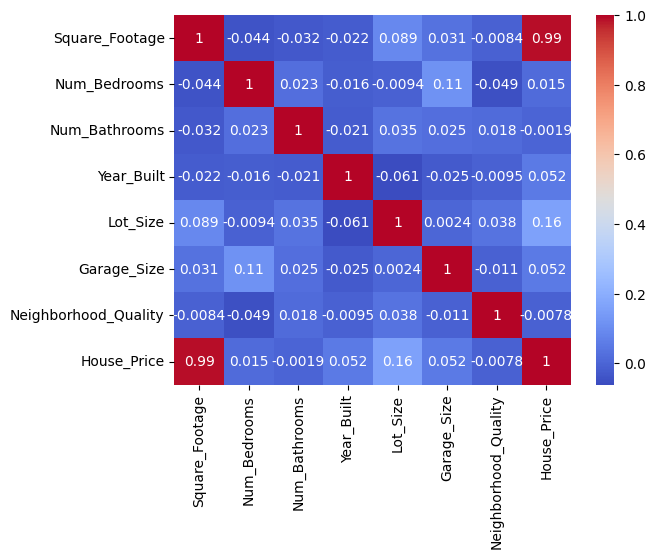

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(pdf['House_Price'])
sns.heatmap(pdf.corr(), annot = True, cmap = 'coolwarm')


In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

x = pdf[['Square_Footage','Num_Bedrooms','Lot_Size']]
y = pdf['House_Price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
model = LinearRegression()
model.fit(x_train, y_train)
preds = model.predict(x_test)
pred_df = pd.DataFrame({'Actual':y_test, 'Predicted':preds})
mse = mean_squared_error(y_test,preds)
r2_score = r2_score(y_test, preds)
print(preds_df)
print(mse)
print(r2_score)




Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

           Actual     Predicted
521  9.010005e+05  8.585408e+05
737  4.945375e+05  5.175220e+05
740  9.494042e+05  9.979938e+05
660  1.040389e+06  1.042875e+06
411  7.940100e+05  7.791519e+05
..            ...           ...
408  8.245296e+05  8.155075e+05
332  1.803936e+05  1.781061e+05
208  9.658167e+05  9.484592e+05
613  4.336642e+05  4.330135e+05
78   6.639050e+05  7.008996e+05

[200 rows x 2 columns]
535689828.99596864
0.9916894302317603


In [0]:
from scipy.stats import ttest_ind
import statsmodels.api as sm

group_a = pdf[pdf['Neighborhood_Quality']<5]
group_b = pdf[pdf['Neighborhood_Quality']>=5]

t_stat, p_value = ttest_ind(group_a['House_Price'], group_b['House_Price'])
print(t_stat, p_value)

stats_a = sm.stats.DescrStatsW(group_a['House_Price'])
stats_b = sm.stats.DescrStatsW(group_b['House_Price'])

cm = sm.stats.CompareMeans(stats_a,stats_b)
cf= cm.tconfint_diff(usevar = "unequal")
print(cf) #includes zero means no significant difference in means

0.6022182433653478 0.5471656673942562
(-22597.372405394068, 42500.86920831105)


In [0]:
import pandas as pd

# Sample DataFrame
data = {
    'Color': ['Red', 'Blue', 'Green', 'Blue', 'Red'],
    'Size': ['S', 'M', 'L', 'M', 'S']
}
df = pd.DataFrame(data)

# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Color', 'Size'], drop_first=True)

print(df_encoded)


   Color_Green  Color_Red  Size_M  Size_S
0            0          1       0       1
1            0          0       1       0
2            1          0       0       0
3            0          0       1       0
4            0          1       0       1


Here’s a concise explanation of each point related to your analysis and preparation for the Takeda interview:

### 1. Transforming Categorical Variables into Continuous Variables (One-Hot Encoding)
- **One-Hot Encoding**: A technique that converts categorical variables into binary columns (0s and 1s). Each category becomes a separate column, helping machine learning algorithms interpret categorical data as numerical input. This prevents misinterpretation of categories as ordinal data (i.e., assuming one category is greater than another).
  
### 2. Clarity on Business Problem to Proceed with Analysis
- **Define the Objective**: Understand the specific business problem you're addressing, such as optimizing pricing strategies for plasma donations. A clear objective helps focus the analysis and guides data exploration and modeling efforts.

### 3. Ask Questions Regarding Data Columns
- **Understand Data Structure**: Clarify the meaning of each column in the dataset. Ask questions like:
  - What does each feature represent?
  - Are there any categorical variables that require encoding?
  - How are missing values handled?
  
### 4. Each Record Represents a Donor with Offered Price and Behavior
- **Data Context**: Recognize that each record likely corresponds to an individual donor's response to a plasma donation offer, represented by a price and a binary outcome (0 = reject, 1 = accept). This context is crucial for analysis and modeling.

### 5. Understand the Function Mechanism
- **Review Functions Used**: Familiarize yourself with the functions you'll use in your analysis, including data manipulation, statistical tests, and modeling functions. Understand their inputs and outputs to effectively apply them during the interview.

### 6. One-Sided T-Test or Two-Sided T-Test
- **T-Test Selection**: Decide whether to conduct a one-sided or two-sided t-test based on the hypothesis:
  - **One-Sided T-Test**: Tests if a parameter is greater than or less than a certain value.
  - **Two-Sided T-Test**: Tests if there is a difference in either direction (greater or less). Choose based on the business question.

### 7. A/B Testing and Types of Hypothesis Testing
- **A/B Testing**: A type of hypothesis test where two groups (A and B) are compared to determine if there is a significant difference between them.
- **Other Types of Hypothesis Tests**: Be aware of tests for multiple samples (e.g., ANOVA) that can compare three or more groups. Understanding these methods enhances your analytical toolbox.

### 8. Power Analysis
- **Statistical Power**: Assess the probability of correctly rejecting the null hypothesis when it is false (detecting an effect if there is one). Power analysis helps determine the sample size needed for the study to ensure reliable results.

### 9. Functions Documentation
- **Access Documentation**: Keep documentation for libraries and functions handy (like pandas, NumPy, or scikit-learn). This will help you quickly reference syntax and usage during the interview.

### 10. Interact with Data and Ask Questions
- **Engage with the Dataset**: Actively explore the data, asking insightful questions and making observations. Being confident in your analysis process will demonstrate your understanding and proficiency in data analysis.

By focusing on these points, you'll be well-prepared for the interview and capable of effectively analyzing the data presented to you.

import pandas as pd

# Load the Parquet file
df = pd.read_parquet('data.parquet')

# Display the first few rows of the dataframe
print(df.head())
